In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
# K折交叉验证
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
# 分层K折交叉验证
from sklearn.model_selection import StratifiedKFold
# 分层随机交叉验证
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import GroupShuffleSplit

np.random.seed(27149)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

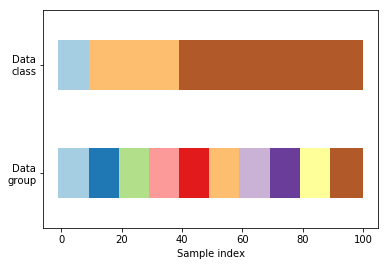

In [47]:
# data
n_points = 100
percentiles_classes = [0.1, 0.3, 0.6]

X = np.random.randn(100, 10)
y = np.hstack([[i] * int(100 * perc) for i, perc in enumerate(percentiles_classes)])
groups = np.hstack([[i] * 10 for i in np.arange(10)])
# print(X.shape)
# print(y.shape)
# print(groups.shape)

def visualize_groups(classes, groups, name):
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)), [0.5] * len(groups), c = groups, marker = '_', lw = 50, cmap = cmap_data)
    ax.scatter(range(len(groups)), [3.5] * len(groups), c = classes, marker = '_', lw = 50, cmap = cmap_data)
    ax.set(ylim = [-1, 5], 
           yticks = [0.5, 3.5], 
           yticklabels = ['Data\ngroup', 'Data\nclass'], 
           xlabel = 'Sample index')
visualize_groups(y, groups, 'no_groups')

In [57]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw = 10):
    for i, (tr, tt) in enumerate(cv.split(X = X, y = y, groups = group)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        ax.scatter(range(len(indices)), [i + 0.5] * len(indices), 
                   c = indices, 
                   marker = '_', 
                   lw = lw, 
                   cmap = cmap_cv, 
                   vmin = -0.2, vmax = 1.20)
    ax.scatter(range(len(X)), [i + 1.5] * len(X),
               c = y,
               marker = '_',
               lw = lw, 
               cmap = cmap_data)
    ax.scatter(range(len(X)), [i + 2.5] * len(X),
               c = group, 
               marker = '_',
               lw = lw, 
               cmap = cmap_data)
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks = np.arange(n_splits + 2) + 0.5, 
           yticklabels = yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim = [n_splits + 2.2, -0.2],
           xlim = [0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize = 15)
    ax.legend([Patch(color = cmap_cv(.8)), Patch(color = cmap_cv(.02))], 
              ['Testing set', 'Training set'], 
              loc = (1.02, .8))
    return ax

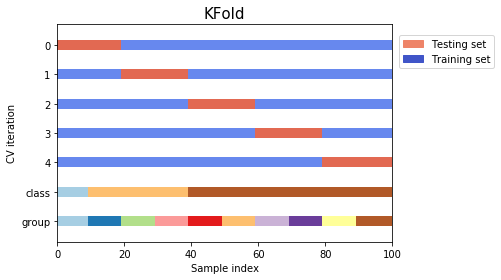

In [65]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

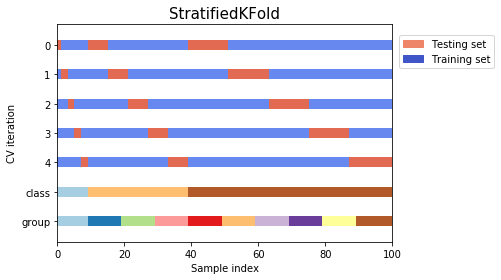

In [59]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

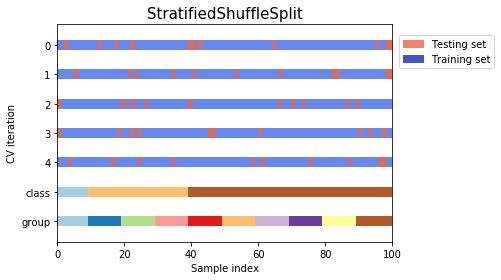

In [60]:
fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

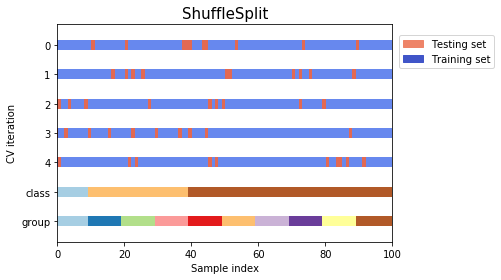

In [61]:
fig, ax = plt.subplots()
cv = ShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

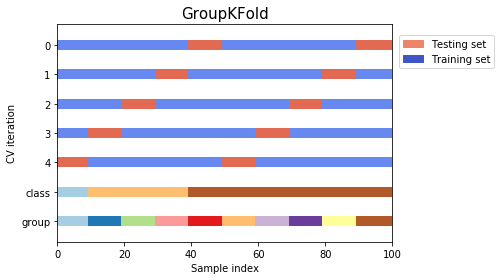

In [62]:
fig, ax = plt.subplots()
cv = GroupKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

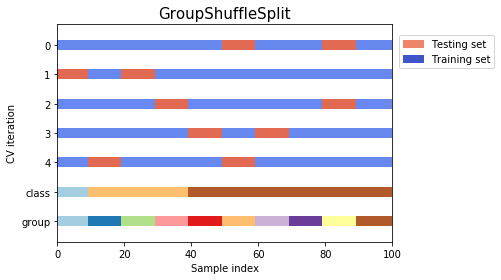

In [63]:
fig, ax = plt.subplots()
cv = GroupShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

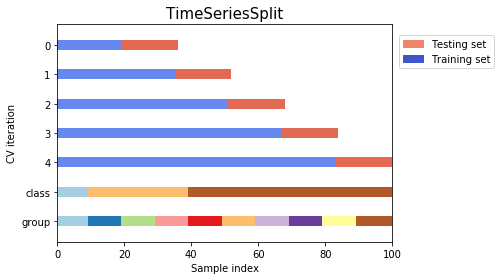

In [64]:
fig, ax = plt.subplots()
cv = TimeSeriesSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);